# OLS - Wooldridge Computer Exercise
## Chapter 6, Exercise 2

## To add a heading:
- Insert a new cell
- Type or paste-in content
- Place a single / just one "pound-sign" in front of the heading content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add a sub-heading:
- Insert a new cell
- Type or paste-in content
- Place two "pound-signs" in front of the sub-heading
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

## To add new bulleted documentation:

- Insert a new cell
- Type or paste-in content
- Place a "dash" character in front of the bulleted content
- Select "Markdown"
- Press "Shift", "Enter" at same time to convert to clean commentary

# References
- Wooldridge, J.M. (2016). Introductory econometrics: A modern approach (6thed.). Mason, OH: South-Western, Cengage Learning.
- Residual Plots: https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034
- Understanding residual plots: https://data.library.virginia.edu/diagnostic-plots/
- VIF: https://etav.github.io/python/vif_factor_python.html
- VIF: https://en.wikipedia.org/wiki/Variance_inflation_factor
- Extracting various values from regression results: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.html

# Instantiate libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.graphics.gofplots import ProbPlot

#import pandas.tseries.api as sm
#from tseries.formula.apt import ols

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


plt.style.use('seaborn') # pretty matplotlib plots

plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

# Latex markup language 
from IPython.display import Latex

# Data Read from csv

In [2]:
%%time
#df = pd.read_csv(BytesIO(csv_as_bytes),sep='|',nrows=100000)
df1 = pd.read_stata('C://Users//mvrie//Downloads//firepit-master//WAGE1.dta')
print(df1.head())

   wage  educ  exper  tenure  nonwhite  female  married  numdep  smsa  \
0  3.10    11      2       0         0       1        0       2     1   
1  3.24    12     22       2         0       1        1       3     1   
2  3.00    11      2       0         0       0        0       2     0   
3  6.00     8     44      28         0       0        1       0     1   
4  5.30    12      7       2         0       0        1       1     0   

   northcen  ...  trcommpu  trade  services  profserv  profocc  clerocc  \
0         0  ...         0      0         0         0        0        0   
1         0  ...         0      0         1         0        0        0   
2         0  ...         0      1         0         0        0        0   
3         0  ...         0      0         0         0        0        1   
4         0  ...         0      0         0         0        0        0   

   servocc     lwage  expersq  tenursq  
0        0  1.131402        4        0  
1        1  1.175573      48

In [3]:
df1['constant'] = 1

# Data Checks
- Columns

In [4]:
%%time
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 525
Data columns (total 25 columns):
wage        526 non-null float32
educ        526 non-null int8
exper       526 non-null int8
tenure      526 non-null int8
nonwhite    526 non-null int8
female      526 non-null int8
married     526 non-null int8
numdep      526 non-null int8
smsa        526 non-null int8
northcen    526 non-null int8
south       526 non-null int8
west        526 non-null int8
construc    526 non-null int8
ndurman     526 non-null int8
trcommpu    526 non-null int8
trade       526 non-null int8
services    526 non-null int8
profserv    526 non-null int8
profocc     526 non-null int8
clerocc     526 non-null int8
servocc     526 non-null int8
lwage       526 non-null float32
expersq     526 non-null int16
tenursq     526 non-null int16
constant    526 non-null int64
dtypes: float32(2), int16(2), int64(1), int8(20)
memory usage: 24.7 KB
Wall time: 49 ms


# Estimate: $lwage = \alpha + \beta_{1}educ + \beta_{2}exper + \beta_{3}exper^2 + \mu$ 

In [5]:
formula = '''lwage ~ educ + exper + expersq
'''
#model = ols(formula, df).fit(cov_type='HC0')
model = ols(formula, df1)
results = model.fit()
aov_table = statsmodels.stats.anova.anova_lm(results, typ=2)
print(aov_table)
print(results.summary())

              sum_sq     df           F        PR(>F)
educ       29.112999    1.0  146.419982  6.979375e-30
exper      12.382757    1.0   62.277440  1.765073e-14
expersq     7.554332    1.0   37.993513  1.421176e-09
Residual  103.790380  522.0         NaN           NaN
                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     74.67
Date:                Sun, 23 Feb 2020   Prob (F-statistic):           3.38e-40
Time:                        10:03:16   Log-Likelihood:                -319.53
No. Observations:                 526   AIC:                             647.1
Df Residuals:                     522   BIC:                             664.1
Df Model:                           3                                         
Covariance Type:   

## Return on education for years of experience
## $ \% \Delta \hat Wage = 100(\hat \beta_{2} + 2\hat \beta_{3} exper)\Delta exper$

In [6]:
coef = results.params
print(coef)
educ = coef.educ
exper = coef.exper
expersq = coef.expersq
print(educ)
print(exper)
print(expersq)

#Return on experience
def ret_exper(experience,incremental_experience):
    rtrn = 100*(exper+(2*expersq*experience))*incremental_experience
    print(rtrn)

#Inflection Point
def inflect(x,x_sq):
    inflct = x/(2*x_sq)
    print(inflct)


print(' ')
print('Return to a 5th year of experience')
ret_exper(5,1)
print(' ')
print('Return to a 20th year of experience')
ret_exper(20,1)

print(' ')
print('Inflection point')
ret_exper(28,1)
ret_exper(29,1)

print(' ')
print('Precise inflection point')
inflect(exper,expersq)

Intercept    0.127998
educ         0.090366
exper        0.041009
expersq     -0.000714
dtype: float64
0.09036581699551188
0.041008875486625754
-0.0007135581589297853
 
Return to a 5th year of experience
3.38732938973279
 
Return to a 20th year of experience
1.246654912943434
 
Inflection point
0.10496185865577767
-0.03774977313017944
 
Precise inflection point
-28.735482156165112


## Inflection Point
- Where returns on education per years of experience turn negative

In [7]:
inflection = np.abs(exper / (2*expersq))
print(inflection)

28.735482156165112


## How many people have more than this many years experience?

In [8]:
df2 = df1[df1['exper'] > 28]
people = np.sum(df2.constant)
print('The number of people with over 28 years experience is: ' + str(people))

The number of people with over 28 years experience is: 121


## Lets plot the polynomial

In [119]:
#Return on experience
def ret_exper2():
    for i in range(40):
        data = {'retexper' : (100*(exper+(2*expersq*i))*1) }
        #print(data)
        df_i = pd.DataFrame(data, index = [i]) 
        #print(df_i)
        if i == 0:
            df_return = df_i
        else:
            df_return = pd.concat([df_return,df_i])
    #print(df_return)
    x = pd.Series(df_return.index)
    y = pd.Series(df_return['retexper'])
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x,y);
    ax.set(title='Return on Wages by Years of Experience', xlabel='years of experience', ylabel='return to wages')
    ax.annotate('negative return inflection point', xy=(28.7, 0), xytext=(15, 3),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

    retexper
0   4.100888
1   3.958176
2   3.815464
3   3.672753
4   3.530041
5   3.387329
6   3.244618
7   3.101906
8   2.959194
9   2.816483
10  2.673771
11  2.531060
12  2.388348
13  2.245636
14  2.102925
15  1.960213
16  1.817501
17  1.674790
18  1.532078
19  1.389367
20  1.246655
21  1.103943
22  0.961232
23  0.818520
24  0.675808
25  0.533097
26  0.390385
27  0.247673
28  0.104962
29 -0.037750
30 -0.180461
31 -0.323173
32 -0.465885
33 -0.608596
34 -0.751308
35 -0.894020
36 -1.036731
37 -1.179443
38 -1.322154
39 -1.464866
     retexper
0    4.100888
1    8.059063
2   11.874528
3   15.547280
4   19.077321
5   22.464651
6   25.709269
7   28.811175
8   31.770369
9   34.586852
10  37.260623
11  39.791683
12  42.180031
13  44.425667
14  46.528592
15  48.488805
16  50.306306
17  51.981096
18  53.513174
19  54.902541
20  56.149196
21  57.253139
22  58.214371
23  59.032891
24  59.708699
25  60.241796
26  60.632181
27  60.879855
28  60.984816
29  60.947067
30  60.766605
31  60.443432
32  5

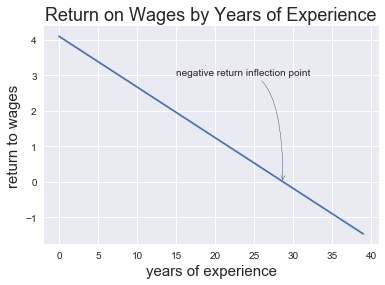

In [120]:
ret_exper2()

In [130]:
#Return on experience
def ret_exper3():
    for i in range(40):
        data = {'retexper' : (100*(exper+(2*expersq*i))*1) }
        #print(data)
        df_i = pd.DataFrame(data, index = [i]) 
        #print(df_i)
        if i == 0:
            df_return = df_i
        else:
            df_return = pd.concat([df_return,df_i])
    df_cume = df_return.cumsum()
    print(df_cume)
    x = pd.Series(df_cume.index)
    y = pd.Series(df_cume['retexper'])
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x,y);
    ax.set(title='Cumulative Return on Wages by Years of Experience', xlabel='years of experience', ylabel='cumulative return to wages')
    ax.annotate('negative return inflection point', xy=(28.7, 60.98), xytext=(10, 20),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

     retexper
0    4.100888
1    8.059063
2   11.874528
3   15.547280
4   19.077321
5   22.464651
6   25.709269
7   28.811175
8   31.770369
9   34.586852
10  37.260623
11  39.791683
12  42.180031
13  44.425667
14  46.528592
15  48.488805
16  50.306306
17  51.981096
18  53.513174
19  54.902541
20  56.149196
21  57.253139
22  58.214371
23  59.032891
24  59.708699
25  60.241796
26  60.632181
27  60.879855
28  60.984816
29  60.947067
30  60.766605
31  60.443432
32  59.977548
33  59.368951
34  58.617643
35  57.723624
36  56.686893
37  55.507450
38  54.185295
39  52.720429


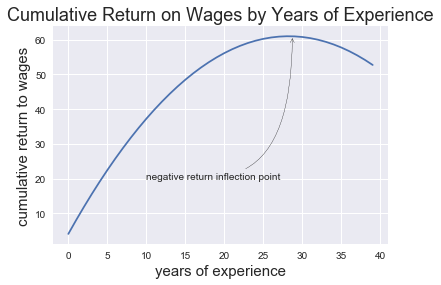

In [131]:
ret_exper3()